In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
customer=pd.read_csv('churn_all.csv')
customer.head()

,CustomerID,Gender,SeniorCitizen,Partner,Dependents,State,Latitude,Longitude,ZipCode,PhoneService,...,TechSupport,StreamingTV,StreamingMovies,Tenure,Contract,PaymentMethod,PaperlessBilling,MonthlyCharges,TotalCharges,Churn
0,3668-QPYBK,Male,No,No,No,California,33.964131,-118.272783,90003,Yes,...,No,No,No,2,Month-to-month,Mailed check,Yes,53.85,108.15,Yes
1,9237-HQITU,Female,No,No,Yes,California,34.059281,-118.307420,90005,Yes,...,No,No,No,2,Month-to-month,Electronic check,Yes,70.70,151.65,Yes
2,9305-CDSKC,Female,No,No,Yes,California,34.048013,-118.293953,90006,Yes,...,No,Yes,Yes,8,Month-to-month,Electronic check,Yes,99.65,820.50,Yes
3,7892-POOKP,Female,No,Yes,Yes,California,34.062125,-118.315709,90010,Yes,...,Yes,Yes,Yes,28,Month-to-month,Electronic check,Yes,104.80,3046.05,Yes
4,0280-XJGEX,Male,No,No,Yes,California,34.039224,-118.266293,90015,Yes,...,No,Yes,Yes,49,Month-to-month,Bank transfer (automatic),Yes,103.70,5036.30,Yes


In [4]:
# Overview of the dataset
print("customer Loaded:")
print(customer.info())

customer Loaded:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerID        7032 non-null   object 
 1   Gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   object 
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   State             7032 non-null   object 
 6   Latitude          7032 non-null   float64
 7   Longitude         7032 non-null   float64
 8   ZipCode           7032 non-null   int64  
 9   PhoneService      7032 non-null   object 
 10  MultipleLines     7032 non-null   object 
 11  InternetService   7032 non-null   object 
 12  OnlineSecurity    7032 non-null   object 
 13  OnlineBackup      7032 non-null   object 
 14  DeviceProtection  7032 non-null   object 
 15  TechSupport       7032 non-null   object 
 16  StreamingTV       7032 no

In [5]:
# Best coverage area - Analyzing customer count by region
coverage_area = customer['State'].value_counts()
print("\nBest Coverage Area (Top 5 States):")
print(coverage_area.head())


Best Coverage Area (Top 5 States):
State
California    7032
Name: count, dtype: int64


In [6]:
# Number of sales (active customers)
active_customers = customer[customer['Churn'] == 'No']
number_of_sales = len(active_customers)
print(f"\nNumber of Active Customers (Sales): {number_of_sales}")


Number of Active Customers (Sales): 5163


In [7]:
# Tech support problem - Customers not subscribed to tech support
tech_support_issues = customer[customer['TechSupport'] == 'No']
tech_support_problem_count = len(tech_support_issues)
print(f"\nNumber of Customers Without Tech Support: {tech_support_problem_count}")


Number of Customers Without Tech Support: 3472


In [8]:
# Service with highest sales
services = ['PhoneService', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'StreamingTV', 'StreamingMovies']
service_sales = {service: customer[service].value_counts().get('Yes', 0) for service in services}
service_with_highest_sales = max(service_sales, key=service_sales.get)
print("\nService with Highest Sales:")
print(f"{service_with_highest_sales}: {service_sales[service_with_highest_sales]}")


Service with Highest Sales:
PhoneService: 6352


In [9]:
# Number of services per customer
service_columns = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
                   'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']
customer['ServicesCount'] = customer[service_columns].apply(lambda x: sum(x == 'Yes'), axis=1)
number_of_services_distribution = customer['ServicesCount'].value_counts()
print("\nNumber of Services per Customer:")
print(number_of_services_distribution)


Number of Services per Customer:
ServicesCount
1    1697
2    1186
3     965
4     921
5     906
6     674
7     395
8     208
0      80
Name: count, dtype: int64


In [10]:
#Total churn customers
churned_customers = len(customer[customer['Churn'] == 'Yes'])
print(f"\nTotal Churn Customers: {churned_customers}")


Total Churn Customers: 1869


In [11]:
# Offers and customer service insights
# Correlation between churn and payment method, contract type, etc.
offers_insights = customer.groupby(['Churn', 'Contract']).size()
customer_service_insights = customer.groupby(['Churn', 'PaymentMethod']).size()

In [12]:
print("\nOffers Insights (Churn by Contract Type):")
print(offers_insights)
print("\nCustomer Service Insights (Churn by Payment Method):")
print(customer_service_insights)


Offers Insights (Churn by Contract Type):
Churn  Contract      
No     Month-to-month    2220
       One year          1306
       Two year          1637
Yes    Month-to-month    1655
       One year           166
       Two year            48
dtype: int64

Customer Service Insights (Churn by Payment Method):
Churn  PaymentMethod            
No     Bank transfer (automatic)    1284
       Credit card (automatic)      1289
       Electronic check             1294
       Mailed check                 1296
Yes    Bank transfer (automatic)     258
       Credit card (automatic)       232
       Electronic check             1071
       Mailed check                  308
dtype: int64


In [19]:
# Calculate churn rate by gender
gender_churn = customer.groupby(['Gender', 'Churn']).size().unstack()
gender_churn['ChurnRate'] = gender_churn['Yes'] / (gender_churn['Yes'] + gender_churn['No'])

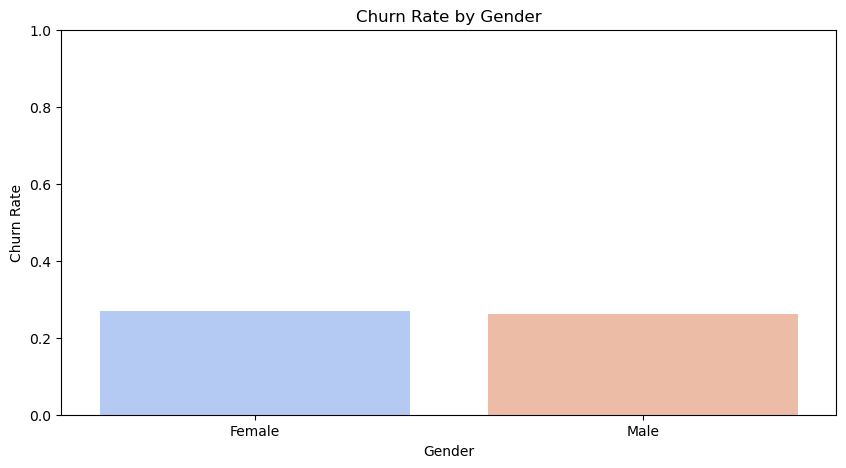

In [20]:
# Plot churn rate by gender
plt.figure(figsize=(10, 5))
sns.barplot(x=gender_churn.index, y=gender_churn['ChurnRate'], palette='coolwarm')
plt.title('Churn Rate by Gender')
plt.ylabel('Churn Rate')
plt.xlabel('Gender')
plt.ylim(0, 1)
plt.show()

In [21]:
# Calculate churn rate for senior citizens
senior_churn = customer.groupby(['SeniorCitizen', 'Churn']).size().unstack()
senior_churn['ChurnRate'] = senior_churn['Yes'] / (senior_churn['Yes'] + senior_churn['No'])

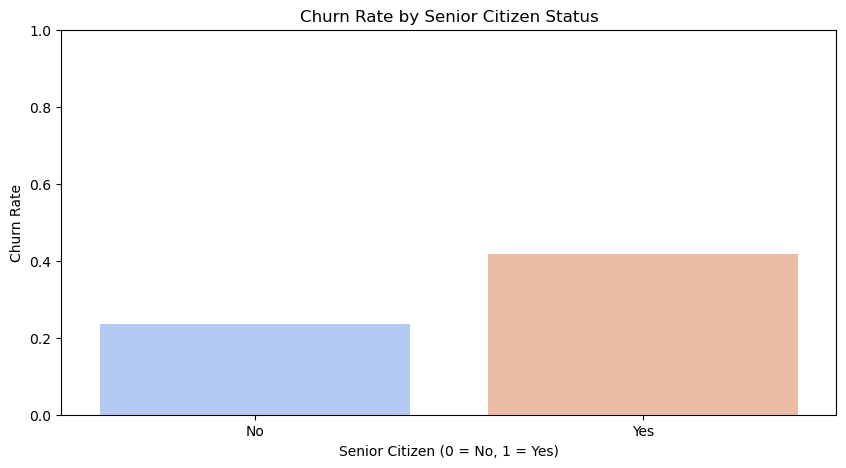

In [22]:
# Plot churn rate for senior citizens
plt.figure(figsize=(10, 5))
sns.barplot(x=senior_churn.index, y=senior_churn['ChurnRate'], palette='coolwarm')
plt.title('Churn Rate by Senior Citizen Status')
plt.ylabel('Churn Rate')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylim(0, 1)
plt.show()

In [25]:
# Count the number of customers subscribed to each service
service_sales = {service: customer[service].value_counts().get('Yes', 0) for service in service_columns}

In [26]:
# Convert to a DataFrame for easier plotting
service_sales_df = pd.DataFrame(list(service_sales.items()), columns=['Service', 'Sales'])

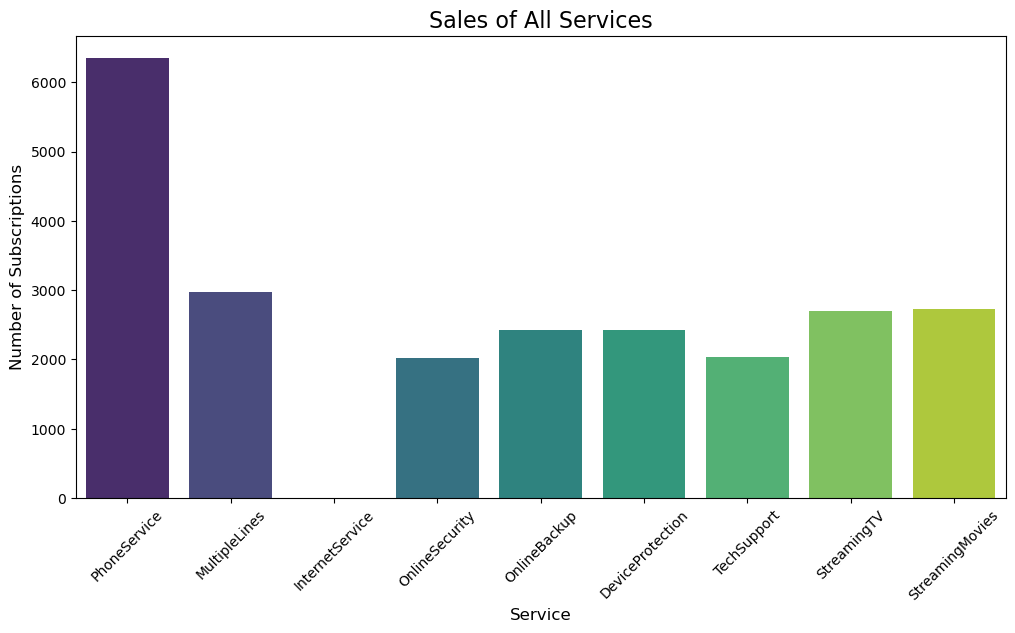

In [27]:
# Plotting the sales via bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Service', y='Sales', data=service_sales_df, palette='viridis')
plt.title('Sales of All Services', fontsize=16)
plt.xlabel('Service', fontsize=12)
plt.ylabel('Number of Subscriptions', fontsize=12)
plt.xticks(rotation=45)
plt.show()